<a href="https://www.kaggle.com/code/suneelkumarpatel/brain-tumor-prediction-new-data?scriptVersionId=139637021" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# HISTORY

#### Abstract
* A Brain tumor is considered as one of the aggressive diseases, among children and adults. Brain tumors account for 85 to 90 percent of all primary Central Nervous System(CNS) tumors. Every year, around 11,700 people are diagnosed with a brain tumor. The 5-year survival rate for people with a cancerous brain or CNS tumor is approximately 34 percent for men and36 percent for women. Brain Tumors are classified as: Benign Tumor, Malignant Tumor, Pituitary Tumor, etc. Proper treatment, planning, and accurate diagnostics should be implemented to improve the life expectancy of the patients. 

* Application of automated classification techniques using Machine Learning(ML) and Artificial Intelligence(AI)has consistently shown higher accuracy than manual classification. Hence, proposing a system performing detection and classification by using Deep Learning Algorithms using Convolution-Neural Network (CNN), Artificial Neural Network (ANN), and Transfer-Learning (TL) would be helpful to doctors all around the world.

#### Context
* Brain Tumors are complex. There are a lot of abnormalities in the sizes and location of the brain tumor(s). This makes it really difficult for complete understanding of the nature of the tumor. Also, a professional Neurosurgeon is required for MRI analysis. 

#### Definition
* To Detect and Classify Brain Tumor using, CNN or ANN; as an asset of Deep Learning and to examine the tumor position(segmentation).

#### About the data:
* The dataset contains 3 folders: yes, no and pred which contains 3060 Brain MRI Images.

# PACKAGES AND LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D
from keras import models
from keras import layers
import tensorflow as tf
import os
import os.path
from pathlib import Path
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from keras.optimizers import RMSprop,Adam
import glob
from PIL import Image

# IGNORING UNNECESSARRY WARNINGS

filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

# PATH PROCESS

#### TRAIN

In [2]:
No_Data_Path = Path("../input/brain-tumor-detection/no")
Yes_Data_Path = Path("../input/brain-tumor-detection/yes")

In [3]:
No_JPG_Path = list(No_Data_Path.glob(r"*.jpg"))
Yes_JPG_Path = list(Yes_Data_Path.glob(r"*.jpg"))

In [4]:
print(No_JPG_Path[0:5])
print("-----"*20)
print(Yes_JPG_Path[0:5])

[PosixPath('../input/brain-tumor-detection/no/no26.jpg'), PosixPath('../input/brain-tumor-detection/no/no979.jpg'), PosixPath('../input/brain-tumor-detection/no/no598.jpg'), PosixPath('../input/brain-tumor-detection/no/no141.jpg'), PosixPath('../input/brain-tumor-detection/no/no715.jpg')]
----------------------------------------------------------------------------------------------------
[PosixPath('../input/brain-tumor-detection/yes/y925.jpg'), PosixPath('../input/brain-tumor-detection/yes/y424.jpg'), PosixPath('../input/brain-tumor-detection/yes/y708.jpg'), PosixPath('../input/brain-tumor-detection/yes/y115.jpg'), PosixPath('../input/brain-tumor-detection/yes/y504.jpg')]


In [5]:
Yes_No_List = []

for No_JPG in No_JPG_Path:
    Yes_No_List.append(No_JPG)
    
for Yes_JPG in Yes_JPG_Path:
    Yes_No_List.append(Yes_JPG)

In [6]:
JPG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Yes_No_List))

In [7]:
print(JPG_Labels[0:10])

['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no']


In [8]:
print("NO COUNTING: ", JPG_Labels.count("no"))
print("YES COUNTING: ", JPG_Labels.count("yes"))

NO COUNTING:  1500
YES COUNTING:  1500


In [9]:
JPG_Path_Series = pd.Series(Yes_No_List,name="JPG").astype(str)
JPG_Category_Series = pd.Series(JPG_Labels,name="TUMOR_CATEGORY")

In [10]:
Main_Train_Data = pd.concat([JPG_Path_Series,JPG_Category_Series],axis=1)

In [11]:
print(Main_Train_Data.head(-1))

                                               JPG TUMOR_CATEGORY
0       ../input/brain-tumor-detection/no/no26.jpg             no
1      ../input/brain-tumor-detection/no/no979.jpg             no
2      ../input/brain-tumor-detection/no/no598.jpg             no
3      ../input/brain-tumor-detection/no/no141.jpg             no
4      ../input/brain-tumor-detection/no/no715.jpg             no
...                                            ...            ...
2994   ../input/brain-tumor-detection/yes/y136.jpg            yes
2995  ../input/brain-tumor-detection/yes/y1379.jpg            yes
2996  ../input/brain-tumor-detection/yes/y1452.jpg            yes
2997   ../input/brain-tumor-detection/yes/y378.jpg            yes
2998   ../input/brain-tumor-detection/yes/y178.jpg            yes

[2999 rows x 2 columns]


#### TEST

In [12]:
Prediction_Path = Path("../input/brain-tumor-detection/pred")

In [13]:
Test_JPG_Path = list(Prediction_Path.glob(r"*.jpg"))

In [14]:
print(Test_JPG_Path[0:5])

[PosixPath('../input/brain-tumor-detection/pred/pred35.jpg'), PosixPath('../input/brain-tumor-detection/pred/pred3.jpg'), PosixPath('../input/brain-tumor-detection/pred/pred56.jpg'), PosixPath('../input/brain-tumor-detection/pred/pred46.jpg'), PosixPath('../input/brain-tumor-detection/pred/pred39.jpg')]


In [15]:
Test_JPG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Test_JPG_Path))

In [16]:
print(Test_JPG_Labels[0:5])

['pred', 'pred', 'pred', 'pred', 'pred']


In [17]:
Test_JPG_Path_Series = pd.Series(Test_JPG_Path,name="JPG").astype(str)
Test_JPG_Labels_Series = pd.Series(Test_JPG_Labels,name="TUMOR_CATEGORY")

In [18]:
Test_Data = pd.concat([Test_JPG_Path_Series,Test_JPG_Labels_Series],axis=1)

In [19]:
print(Test_Data.head())

                                              JPG TUMOR_CATEGORY
0  ../input/brain-tumor-detection/pred/pred35.jpg           pred
1   ../input/brain-tumor-detection/pred/pred3.jpg           pred
2  ../input/brain-tumor-detection/pred/pred56.jpg           pred
3  ../input/brain-tumor-detection/pred/pred46.jpg           pred
4  ../input/brain-tumor-detection/pred/pred39.jpg           pred


# SHUFFLING

In [20]:
Main_Train_Data = Main_Train_Data.sample(frac=1).reset_index(drop=True)

In [21]:
print(Main_Train_Data.head(-1))

                                               JPG TUMOR_CATEGORY
0     ../input/brain-tumor-detection/yes/y1171.jpg            yes
1      ../input/brain-tumor-detection/yes/y997.jpg            yes
2      ../input/brain-tumor-detection/yes/y851.jpg            yes
3     ../input/brain-tumor-detection/no/no1497.jpg             no
4     ../input/brain-tumor-detection/yes/y1112.jpg            yes
...                                            ...            ...
2994  ../input/brain-tumor-detection/yes/y1209.jpg            yes
2995   ../input/brain-tumor-detection/yes/y922.jpg            yes
2996    ../input/brain-tumor-detection/yes/y70.jpg            yes
2997   ../input/brain-tumor-detection/no/no639.jpg             no
2998   ../input/brain-tumor-detection/no/no862.jpg             no

[2999 rows x 2 columns]


# VISUALIZATION

Text(0.5, 1.0, 'no')

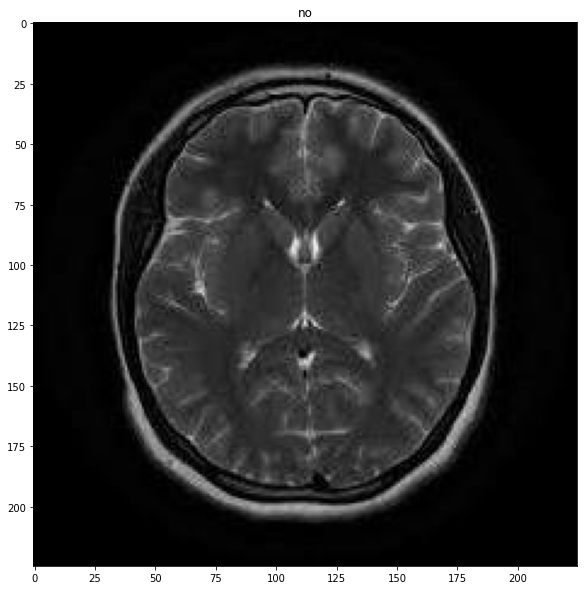

In [22]:
figure = plt.figure(figsize=(10,10))
plt.imshow(plt.imread(Main_Train_Data["JPG"][10]))
plt.title(Main_Train_Data["TUMOR_CATEGORY"][10])

Text(0.5, 1.0, 'no')

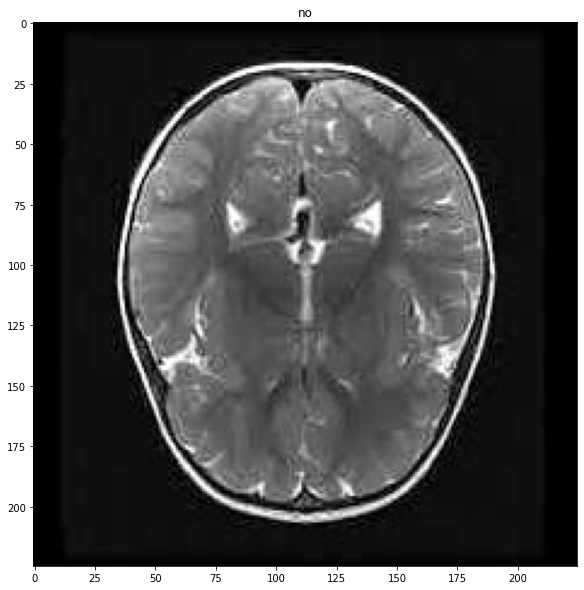

In [23]:
figure = plt.figure(figsize=(10,10))
plt.imshow(plt.imread(Main_Train_Data["JPG"][2997]))
plt.title(Main_Train_Data["TUMOR_CATEGORY"][2997])

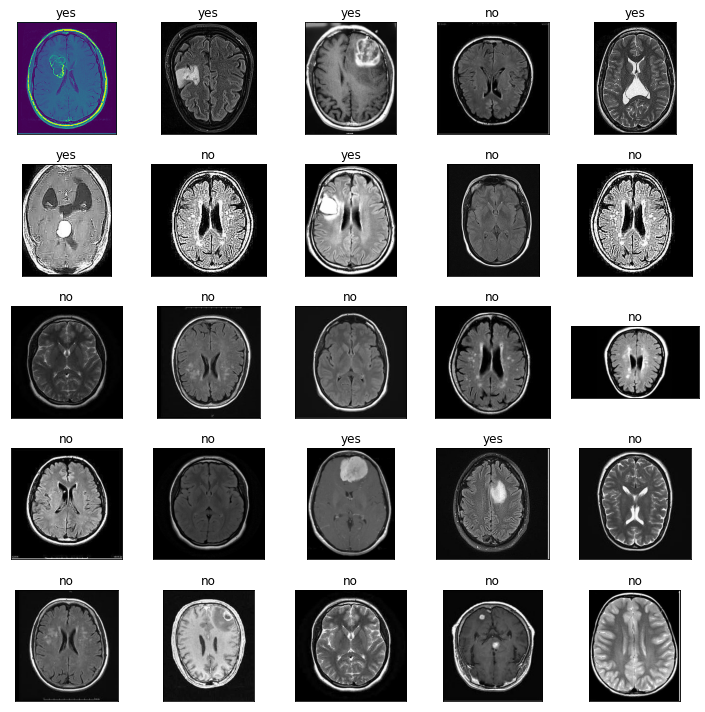

In [24]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Train_Data["JPG"][i]))
    ax.set_title(Main_Train_Data["TUMOR_CATEGORY"][i])
plt.tight_layout()
plt.show()

# MODEL TRAINING DATA

In [25]:
train_data,test_data = train_test_split(Main_Train_Data,train_size=0.9,random_state=42)

In [26]:
print(train_data.shape)

(2700, 2)


In [27]:
print(train_data.head())

                                              JPG TUMOR_CATEGORY
433   ../input/brain-tumor-detection/no/no555.jpg             no
1151  ../input/brain-tumor-detection/yes/y230.jpg            yes
73    ../input/brain-tumor-detection/yes/y344.jpg            yes
1536  ../input/brain-tumor-detection/no/no398.jpg             no
2709  ../input/brain-tumor-detection/no/no545.jpg             no


In [28]:
print(test_data.shape)

(300, 2)


In [29]:
print(test_data.head())

                                               JPG TUMOR_CATEGORY
1801   ../input/brain-tumor-detection/yes/y396.jpg            yes
1190  ../input/brain-tumor-detection/yes/y1319.jpg            yes
1817   ../input/brain-tumor-detection/yes/y685.jpg            yes
251   ../input/brain-tumor-detection/yes/y1037.jpg            yes
2505   ../input/brain-tumor-detection/yes/y633.jpg            yes


# IMAGE DATA GENERATOR WITHOUT DIVERSIFICATION

#### BASED ON TRAIN DATA

In [30]:
Generator_Basic = ImageDataGenerator(rescale=1./255,
                                     validation_split=0.1)

In [31]:
Train_Set = Generator_Basic.flow_from_dataframe(dataframe=train_data,
                                               x_col="JPG",
                                               y_col="TUMOR_CATEGORY",
                                               color_mode="grayscale",
                                               class_mode="categorical",
                                               subset="training",
                                               batch_size=20,
                                               target_size=(200,200))

Found 2430 validated image filenames belonging to 2 classes.


In [32]:
Validation_Set = Generator_Basic.flow_from_dataframe(dataframe=train_data,
                                                     x_col="JPG",
                                                     y_col="TUMOR_CATEGORY",
                                                     color_mode="grayscale",
                                                     class_mode="categorical",
                                                     subset="validation",
                                                     batch_size=20,
                                                     target_size=(200,200))

Found 270 validated image filenames belonging to 2 classes.


In [33]:
Test_Set = Generator_Basic.flow_from_dataframe(dataframe=test_data,
                                              x_col="JPG",
                                              y_col="TUMOR_CATEGORY",
                                              color_mode="grayscale",
                                              class_mode="categorical",
                                              batch_size=20,
                                              target_size=(200,200))

Found 300 validated image filenames belonging to 2 classes.


#### CHECKING

In [34]:
for data_batch,label_batch in Train_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (20, 200, 200, 1)
LABEL SHAPE:  (20, 2)


In [35]:
for data_batch,label_batch in Validation_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (20, 200, 200, 1)
LABEL SHAPE:  (20, 2)


In [36]:
for data_batch,label_batch in Test_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (20, 200, 200, 1)
LABEL SHAPE:  (20, 2)


In [37]:
print(Train_Set.class_indices)
print(Train_Set.classes[0:5])
print(Train_Set.image_shape)

{'no': 0, 'yes': 1}
[1, 1, 1, 1, 1]
(200, 200, 1)


In [38]:
print(Validation_Set.class_indices)
print(Validation_Set.classes[0:5])
print(Validation_Set.image_shape)

{'no': 0, 'yes': 1}
[0, 1, 1, 0, 0]
(200, 200, 1)


In [39]:
print(Test_Set.class_indices)
print(Test_Set.classes[0:5])
print(Test_Set.image_shape)

{'no': 0, 'yes': 1}
[1, 1, 1, 1, 1]
(200, 200, 1)


# CNN MODEL FOR NON-DIVERSIFICATION

#### MODEL STRUCTURE

In [40]:
Model = Sequential()

Model.add(Conv2D(32,(5,5),activation="relu",input_shape=(200,200,1)))
Model.add(MaxPool2D((2,2)))
Model.add(Dropout(0.2))
#
Model.add(Conv2D(64,(3,3),activation="relu"))
Model.add(MaxPool2D((2,2)))
Model.add(Dropout(0.2))
#
Model.add(Conv2D(128,(3,3),activation="relu"))
Model.add(MaxPool2D((2,2)))
Model.add(Dropout(0.2))
#
Model.add(Conv2D(256,(3,3),activation="relu"))
Model.add(MaxPool2D((2,2)))
Model.add(Dropout(0.2))
#
Model.add(Flatten())
Model.add(Dropout(0.5))
Model.add(Dense(512,activation="relu"))
Model.add(Dense(2,activation="softmax"))

#### MODEL COMPILE

In [41]:
Model.compile(optimizer=RMSprop(lr=0.001),loss="categorical_crossentropy",metrics=["accuracy"])

#### MODEL FITTING

In [42]:
ANN_Model = Model.fit(Train_Set,validation_data=Validation_Set,
                      epochs=30,steps_per_epoch=120)

Epoch 1/30
120/120 [==============================] - 20s 134ms/step - loss: 3.5167 - accuracy: 0.6464 - val_loss: 0.4762 - val_accuracy: 0.7926
Epoch 2/30
120/120 [==============================] - 9s 73ms/step - loss: 0.4668 - accuracy: 0.7938 - val_loss: 0.3745 - val_accuracy: 0.8407
Epoch 3/30
120/120 [==============================] - 9s 73ms/step - loss: 0.3558 - accuracy: 0.8394 - val_loss: 0.4206 - val_accuracy: 0.7778
Epoch 4/30
120/120 [==============================] - 9s 76ms/step - loss: 0.2813 - accuracy: 0.8791 - val_loss: 0.2250 - val_accuracy: 0.9148
Epoch 5/30
120/120 [==============================] - 9s 71ms/step - loss: 0.2396 - accuracy: 0.9022 - val_loss: 0.1656 - val_accuracy: 0.9481
Epoch 6/30
120/120 [==============================] - 9s 73ms/step - loss: 0.1758 - accuracy: 0.9369 - val_loss: 0.1115 - val_accuracy: 0.9741
Epoch 7/30
120/120 [==============================] - 9s 71ms/step - loss: 0.1648 - accuracy: 0.9371 - val_loss: 0.1123 - val_accuracy: 0.97

#### MODEL SUMMARY

In [43]:
print(Model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 196, 196, 32)      832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 98, 98, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 128)       7

#### CHECKING MODEL WITH GRAPHIC

In [44]:
HistoryDict = ANN_Model.history

val_losses = HistoryDict["val_loss"]
val_acc = HistoryDict["val_accuracy"]
acc = HistoryDict["accuracy"]
losses = HistoryDict["loss"]
epochs = range(1,len(val_losses)+1)

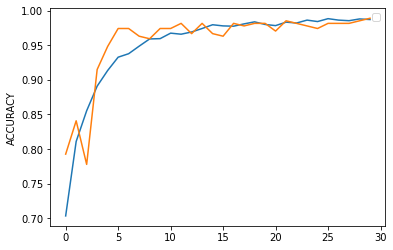

In [45]:
plt.plot(ANN_Model.history["accuracy"])
plt.plot(ANN_Model.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

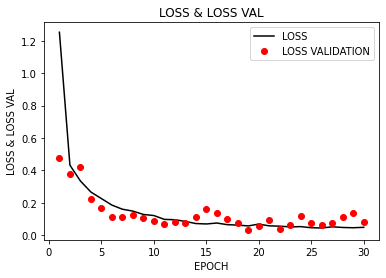

In [46]:
plt.plot(epochs,losses,"k-",label="LOSS")
plt.plot(epochs,val_losses,"ro",label="LOSS VALIDATION")
plt.title("LOSS & LOSS VAL")
plt.xlabel("EPOCH")
plt.ylabel("LOSS & LOSS VAL")
plt.legend()
plt.show()

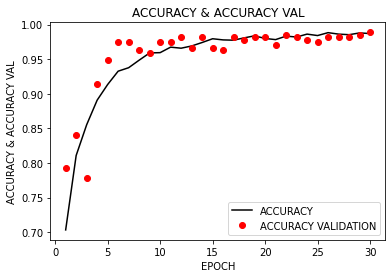

In [47]:
plt.plot(epochs,acc,"k-",label="ACCURACY")
plt.plot(epochs,val_acc,"ro",label="ACCURACY VALIDATION")
plt.title("ACCURACY & ACCURACY VAL")
plt.xlabel("EPOCH")
plt.ylabel("ACCURACY & ACCURACY VAL")
plt.legend()
plt.show()

<AxesSubplot:>

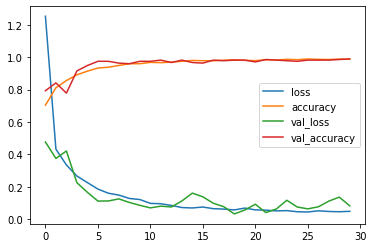

In [48]:
Dict_Summary = pd.DataFrame(ANN_Model.history)
Dict_Summary.plot()

#### PREDICTION SCORE ON DIVIDED DATA

In [49]:
Model_Results = Model.evaluate(Test_Set,verbose=False)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

LOSS:  0.0689
ACCURACY:  0.99


#### PREDICTION PROCESS

In [50]:
Main_Data_Prediction = pd.DataFrame({"JPG":Test_JPG_Path_Series})

In [51]:
print(Main_Data_Prediction.head())

                                              JPG
0  ../input/brain-tumor-detection/pred/pred35.jpg
1   ../input/brain-tumor-detection/pred/pred3.jpg
2  ../input/brain-tumor-detection/pred/pred56.jpg
3  ../input/brain-tumor-detection/pred/pred46.jpg
4  ../input/brain-tumor-detection/pred/pred39.jpg


In [52]:
Main_Test_Generator = ImageDataGenerator(rescale=1./255)

In [53]:
Main_Test_Set = Main_Test_Generator.flow_from_dataframe(dataframe=Main_Data_Prediction,
                                                       x_col="JPG",
                                                       y_col=None,
                                                       color_mode="grayscale",
                                                        class_mode=None,
                                                        batch_size=20,
                                                        target_size=(200,200))

Found 60 validated image filenames.


In [54]:
Model_Test_Prediction = Model.predict(Main_Test_Set)

In [55]:
Model_Test_Prediction = Model_Test_Prediction.argmax(axis=-1)

In [56]:
print(Model_Test_Prediction)

[0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 1 0 0
 1 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 1 0 0 0 0 1 1]


In [57]:
Last_Prediction = []
[Last_Prediction.append('NO') if i == 1 else Last_Prediction.append('TUMOR') for i in Model_Test_Prediction]
print(Last_Prediction)

['TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'NO', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'NO', 'TUMOR', 'NO', 'NO', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'NO', 'NO', 'NO', 'NO', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'NO']


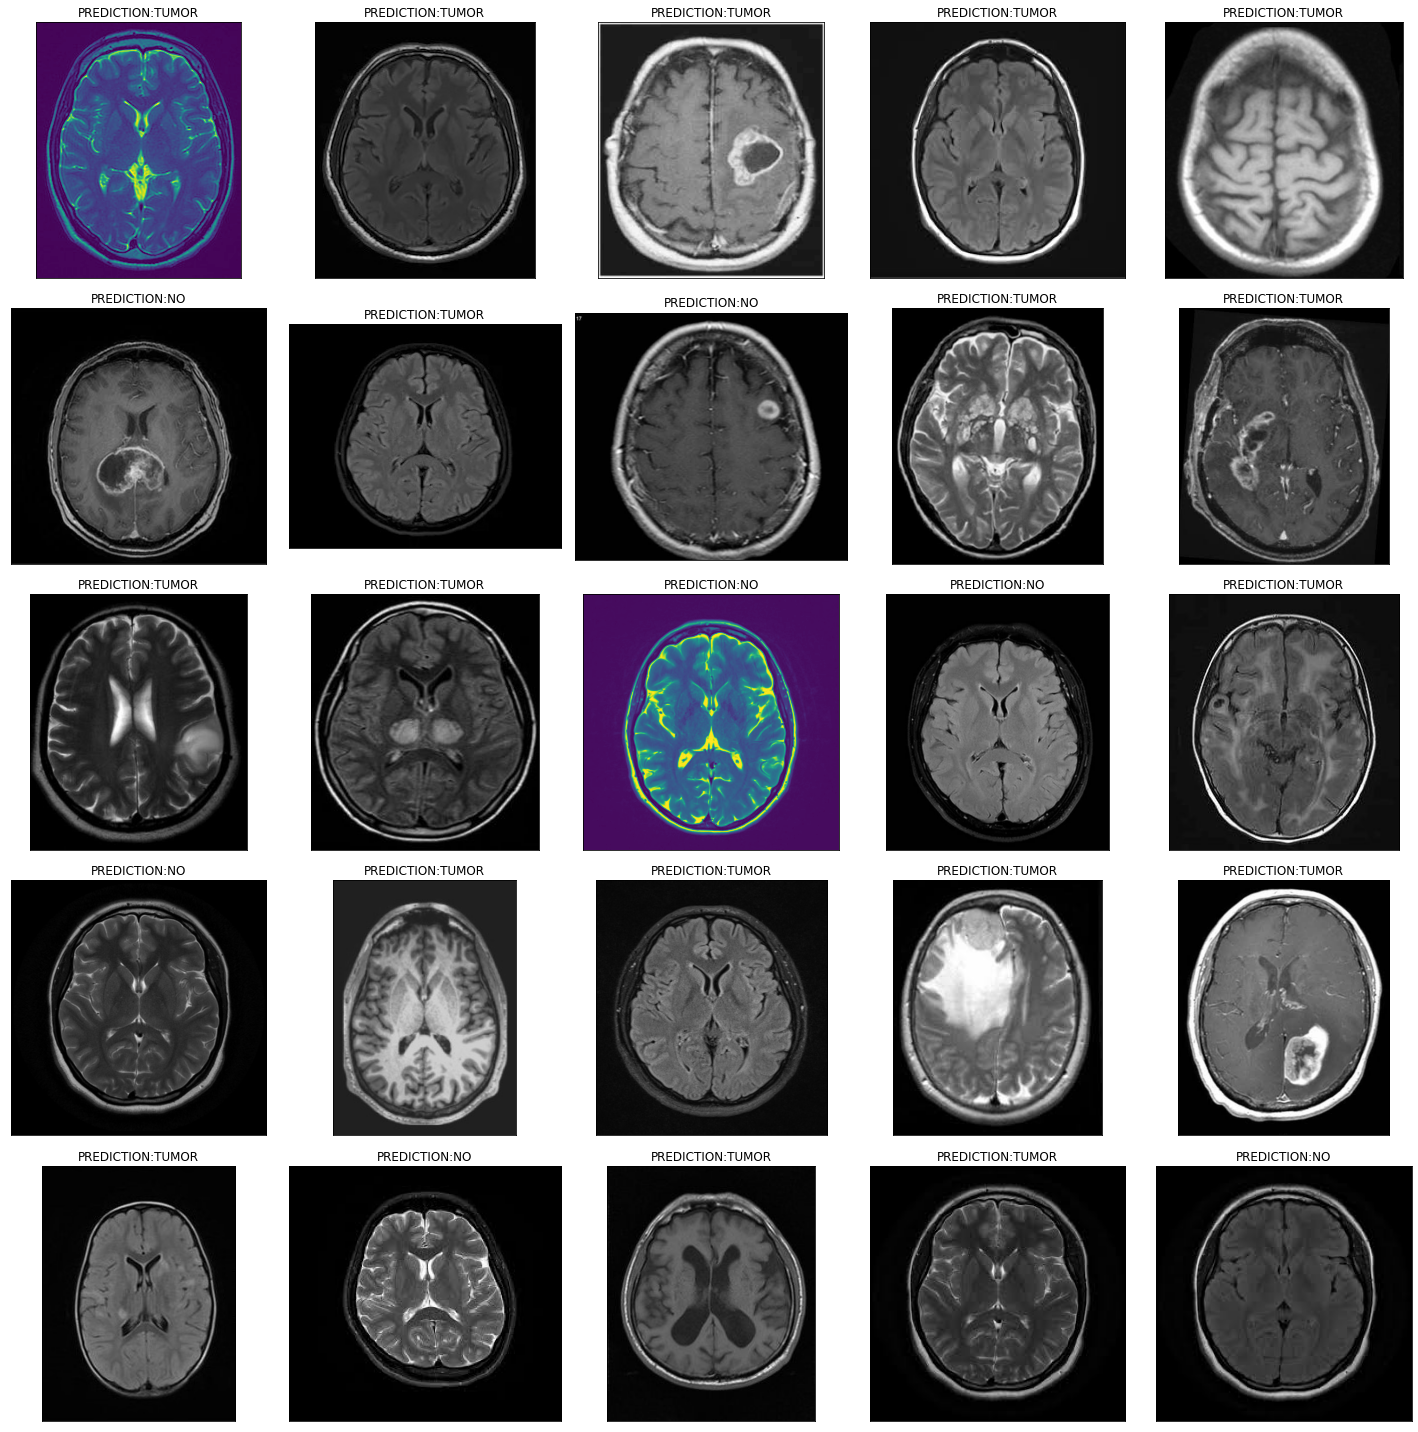

In [58]:
fig, axes = plt.subplots(nrows=5,
                         ncols=5,
                         figsize=(20, 20),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Data_Prediction["JPG"].loc[i]))
    ax.set_title(f"PREDICTION:{Last_Prediction[i]}")
plt.tight_layout()
plt.show()

# IMAGE DATA GENERATOR WITH DIVERSIFICATION

In [59]:
Data_Generator_Div = ImageDataGenerator(rescale=1./255,brightness_range=[0.3,0.9],
                                       rotation_range=30,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       shear_range=0.2,
                                       horizontal_flip=True,
                                       fill_mode="nearest",
                                       validation_split=0.1)

In [60]:
Train_Set_Div = Data_Generator_Div.flow_from_dataframe(dataframe=train_data,
                                               x_col="JPG",
                                               y_col="TUMOR_CATEGORY",
                                               color_mode="grayscale",
                                               class_mode="categorical",
                                               subset="training",
                                               batch_size=20,
                                               target_size=(200,200))

Found 2430 validated image filenames belonging to 2 classes.


In [61]:
Validation_Set_Div = Data_Generator_Div.flow_from_dataframe(dataframe=train_data,
                                                     x_col="JPG",
                                                     y_col="TUMOR_CATEGORY",
                                                     color_mode="grayscale",
                                                     class_mode="categorical",
                                                     subset="validation",
                                                     batch_size=20,
                                                     target_size=(200,200))

Found 270 validated image filenames belonging to 2 classes.


In [62]:
Test_Set_Div = Data_Generator_Div.flow_from_dataframe(dataframe=Main_Data_Prediction,
                                                       x_col="JPG",
                                                       y_col=None,
                                                       color_mode="grayscale",
                                                        class_mode=None,
                                                        batch_size=20,
                                                        target_size=(200,200))

Found 60 validated image filenames.


# CNN MODEL WITH DIVERSIFICATION

#### MODEL STRUCTURE

In [63]:
Model_Two = Sequential()

Model_Two.add(Conv2D(32,(5,5),activation="relu",input_shape=(200,200,1)))
Model_Two.add(MaxPool2D((2,2)))
#
Model_Two.add(Conv2D(64,(3,3),activation="relu"))
Model_Two.add(MaxPool2D((2,2)))
#
Model_Two.add(Conv2D(128,(3,3),activation="relu"))
Model_Two.add(MaxPool2D((2,2)))
#
Model_Two.add(Conv2D(128,(3,3),activation="relu"))
Model_Two.add(MaxPool2D((2,2)))
#
Model_Two.add(Conv2D(256,(3,3),activation="relu"))
Model_Two.add(MaxPool2D((2,2)))
#
Model_Two.add(Flatten())
Model_Two.add(Dropout(0.5))
Model_Two.add(Dense(512,activation="relu"))
Model_Two.add(Dense(2,activation="softmax"))

#### MODEL COMPILE

In [64]:
Model_Two.compile(optimizer=RMSprop(lr=0.001),loss="categorical_crossentropy",metrics=["accuracy"])

#### MODEL FITTING

In [65]:
ANN_Model_Two = Model_Two.fit(Train_Set_Div,
                              validation_data=Validation_Set_Div,
                              batch_size=20,
                      epochs=50)

Epoch 1/50
122/122 [==============================] - 18s 139ms/step - loss: 0.7345 - accuracy: 0.5177 - val_loss: 0.6423 - val_accuracy: 0.6556
Epoch 2/50
122/122 [==============================] - 18s 146ms/step - loss: 0.6548 - accuracy: 0.6380 - val_loss: 0.5959 - val_accuracy: 0.6815
Epoch 3/50
122/122 [==============================] - 16s 135ms/step - loss: 0.6320 - accuracy: 0.6804 - val_loss: 0.5308 - val_accuracy: 0.7556
Epoch 4/50
122/122 [==============================] - 18s 150ms/step - loss: 0.5700 - accuracy: 0.7304 - val_loss: 0.8270 - val_accuracy: 0.5630
Epoch 5/50
122/122 [==============================] - 17s 140ms/step - loss: 0.5656 - accuracy: 0.7515 - val_loss: 0.5009 - val_accuracy: 0.7852
Epoch 6/50
122/122 [==============================] - 17s 141ms/step - loss: 0.5206 - accuracy: 0.7734 - val_loss: 0.4927 - val_accuracy: 0.7889
Epoch 7/50
122/122 [==============================] - 17s 141ms/step - loss: 0.5260 - accuracy: 0.7649 - val_loss: 0.4954 - val_ac

#### MODEL SUMMARY

In [66]:
print(Model_Two.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 196, 196, 32)      832       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 96, 96, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 21, 21, 128)      

#### CHECKING MODEL WITH GRAPHIC

In [67]:
HistoryDict_Two = ANN_Model_Two.history

val_losses_Two = HistoryDict_Two["val_loss"]
val_acc_Two = HistoryDict_Two["val_accuracy"]
acc_Two = HistoryDict_Two["accuracy"]
losses_Two = HistoryDict_Two["loss"]
epochs_Two = range(1,len(val_losses_Two)+1)

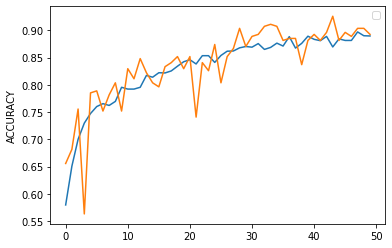

In [68]:
plt.plot(ANN_Model_Two.history["accuracy"])
plt.plot(ANN_Model_Two.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

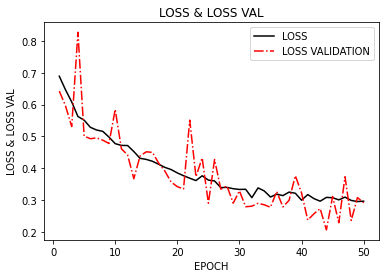

In [69]:
plt.plot(epochs_Two,losses_Two,"k-",label="LOSS")
plt.plot(epochs_Two,val_losses_Two,"r-.",label="LOSS VALIDATION")
plt.title("LOSS & LOSS VAL")
plt.xlabel("EPOCH")
plt.ylabel("LOSS & LOSS VAL")
plt.legend()
plt.show()

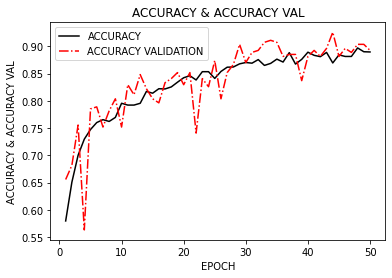

In [70]:
plt.plot(epochs_Two,acc_Two,"k-",label="ACCURACY")
plt.plot(epochs_Two,val_acc_Two,"r-.",label="ACCURACY VALIDATION")
plt.title("ACCURACY & ACCURACY VAL")
plt.xlabel("EPOCH")
plt.ylabel("ACCURACY & ACCURACY VAL")
plt.legend()
plt.show()

<AxesSubplot:>

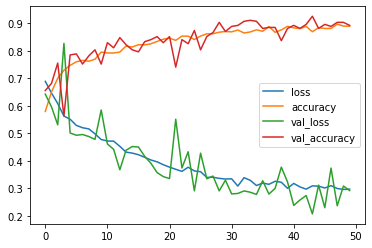

In [71]:
Dict_Summary_Two = pd.DataFrame(ANN_Model_Two.history)
Dict_Summary_Two.plot()

#### PREDICTION SCORE ON DIVIDED DATA

In [72]:
Model_Results_Two = Model_Two.evaluate(Test_Set,verbose=False)
print("LOSS:  " + "%.4f" % Model_Results_Two[0])
print("ACCURACY:  " + "%.2f" % Model_Results_Two[1])

LOSS:  0.2732
ACCURACY:  0.91


#### PREDICTION PROCESS

In [73]:
Model_Test_Prediction_Two = Model_Two.predict(Test_Set_Div)

In [74]:
Model_Test_Prediction_Two = Model_Test_Prediction_Two.argmax(axis=-1)

In [75]:
print(Model_Test_Prediction_Two)

[0 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 0 0 0
 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1]


In [76]:
Last_Prediction_Two = []
[Last_Prediction_Two.append('NO') if i == 1 else Last_Prediction_Two.append('TUMOR') for i in Model_Test_Prediction_Two]
print(Last_Prediction_Two)

['TUMOR', 'TUMOR', 'NO', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'NO', 'NO', 'NO', 'TUMOR', 'NO', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'NO', 'NO', 'NO', 'NO', 'TUMOR', 'NO', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'NO', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'NO', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'NO', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'NO']


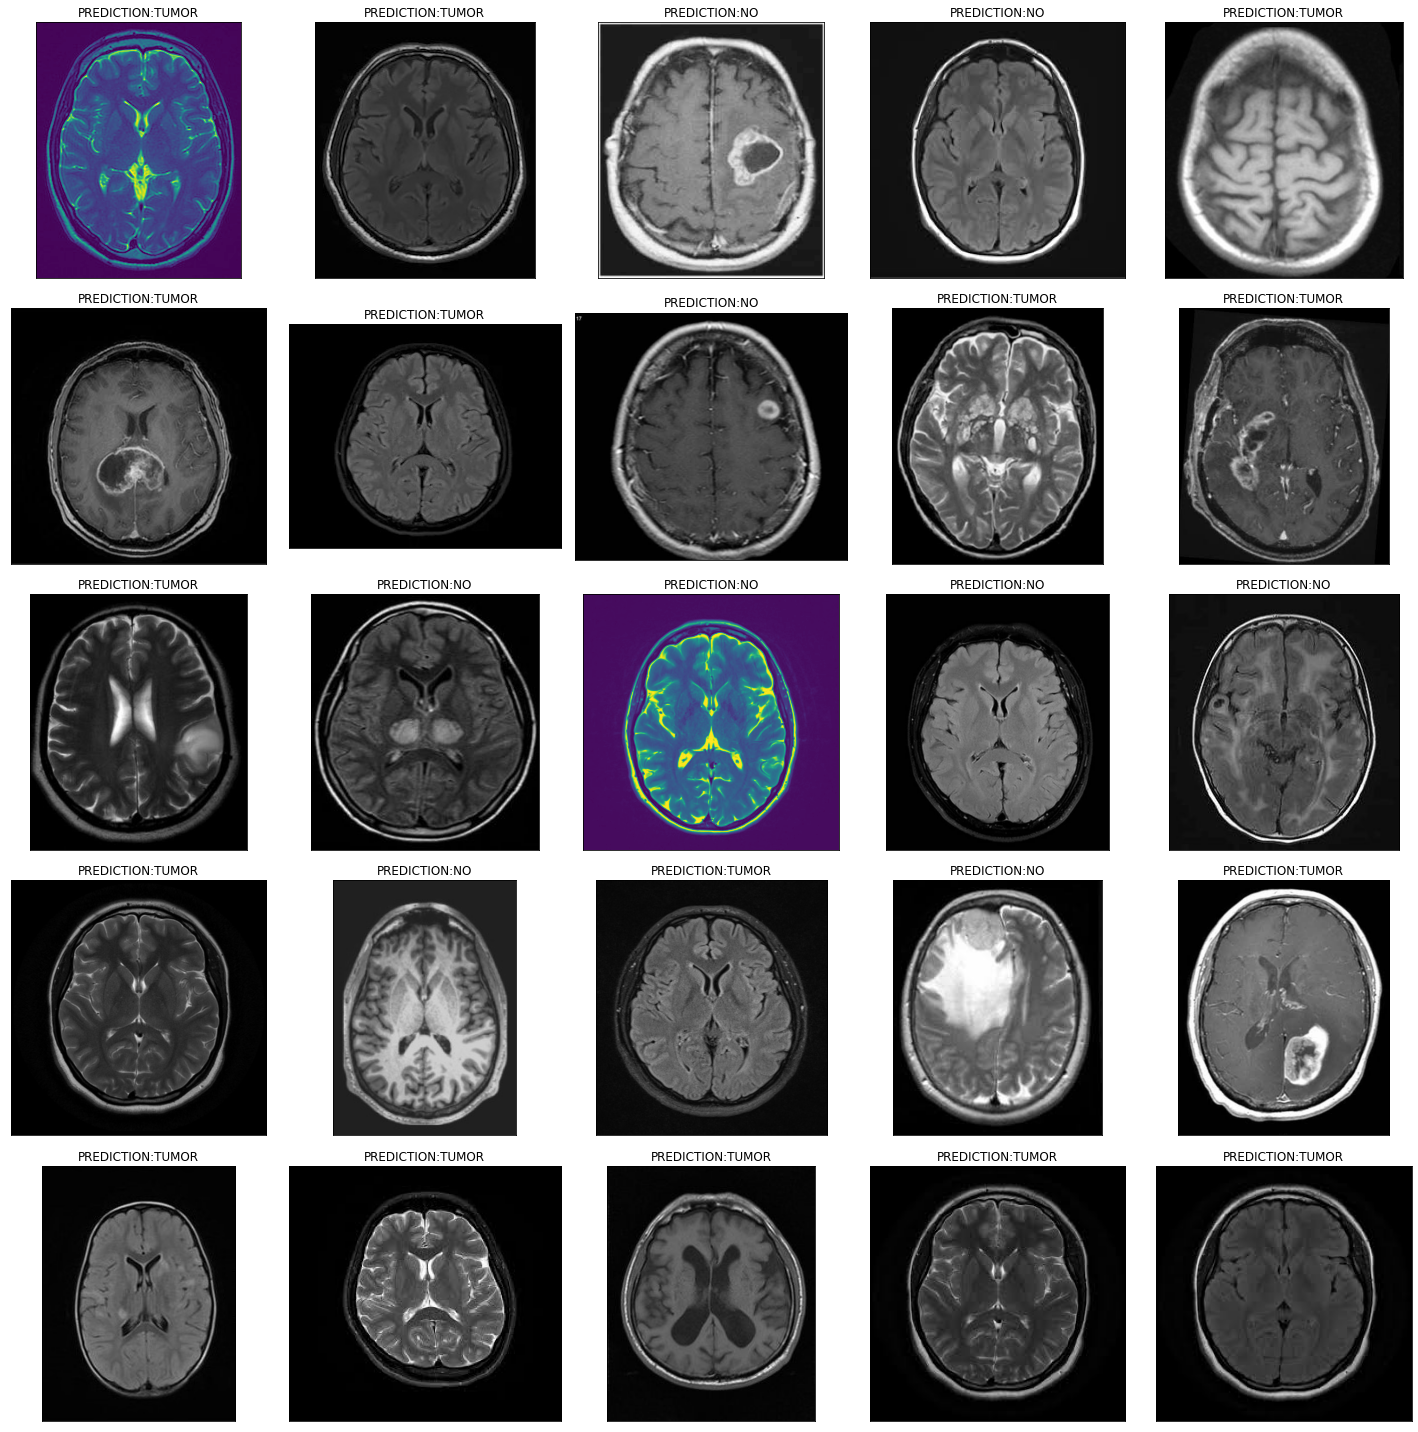

In [77]:
fig, axes = plt.subplots(nrows=5,
                         ncols=5,
                         figsize=(20, 20),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Data_Prediction["JPG"].loc[i]))
    ax.set_title(f"PREDICTION:{Last_Prediction_Two[i]}")
plt.tight_layout()
plt.show()